In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [79]:
url = '../../data/clean/df_complete3.csv'
df_complete = pd.read_csv(url)
df_complete.columns

Index(['client_id', 'visitor_id', 'visit_id', 'start_time', 'confirm_time',
       'total_time_spent', 'Variation_x', 'Variation_y', 'clnt_tenure_yr',
       'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'female', 'male', 'unknown'],
      dtype='object')

In [81]:
# Create a new dichotomic column, where 'Test' becomes 0 and Control become 0
df_complete['group_dichotomic'] = df_complete['Variation_y'].apply(lambda x: 1 if x == 'Test' else 0)
df_complete

,client_id,visitor_id,visit_id,start_time,confirm_time,total_time_spent,Variation_x,Variation_y,clnt_tenure_yr,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,female,male,unknown,group_dichotomic
0,1936,883992205_24100452548,943469853_76229226125_839996,2017-03-29 12:52:48,2017-03-29 12:55:56,188.0,Test,Test,5.0,26.5,2.0,52447.90,6.0,9.0,0,1,0,1
1,4484,929634148_40943099576,66056328_29973355596_981576,2017-04-05 20:40:10,2017-04-05 20:52:35,745.0,Test,Test,16.0,48.5,2.0,51499.77,2.0,5.0,0,1,0,1
2,6985,157368510_91928042506,702486929_79839403728_901057,2017-04-16 14:19:15,2017-04-16 14:24:46,331.0,Control,Control,7.0,61.5,3.0,84975.60,6.0,9.0,0,0,1,0
3,7657,591719386_90464616750,155200945_99956206989_392959,2017-04-05 12:43:34,2017-04-05 12:45:11,97.0,Test,Test,18.0,41.5,2.0,55643.37,2.0,5.0,0,1,0,1
4,11054,952592414_63731951988,175972021_93800420846_435503,2017-05-16 11:30:16,2017-05-16 11:38:45,509.0,Control,Control,4.0,60.0,2.0,208185.54,2.0,5.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6854,9994115,434880129_22821511966,529543040_50025576470_13273,2017-05-03 15:58:45,2017-05-03 16:02:52,247.0,Test,Test,20.0,53.5,3.0,134233.63,4.0,7.0,1,0,0,1
6855,9994764,208048562_5591648325,945115982_5995160722_563889,2017-04-24 12:19:59,2017-04-24 12:37:17,1038.0,Test,Test,5.0,30.5,2.0,58258.46,6.0,9.0,0,0,1,1
6856,9996404,336369837_4061930799,943539475_90967917948_823342,2017-03-29 12:00:01,2017-03-29 12:23:03,1382.0,Control,Control,10.0,30.5,3.0,130631.12,6.0,9.0,0,1,0,0
6857,9997470,395791369_55562604618,761490147_96352537762_21814,2017-05-09 15:56:18,2017-05-09 16:39:34,2596.0,Control,Control,6.0,36.0,2.0,53543.03,0.0,3.0,0,0,1,0


In [83]:
# Define the dependent and independent variables
X = df_complete[['clnt_tenure_yr', 'clnt_age', 'bal','calls_6_mnth', 'female', 'male', 'group_dichotomic']] 
Y = df_complete['total_time_spent']  # dependent variable

# Add a constant to the independent variables (for the intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_time_spent   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     19.80
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.89e-26
Time:                        17:53:58   Log-Likelihood:                -54014.
No. Observations:                6859   AIC:                         1.080e+05
Df Residuals:                    6851   BIC:                         1.081e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              218.0194     29.771  

In [85]:
# Specify the columns you're interested in
columns_to_include = ['total_time_spent', 'clnt_tenure_yr', 'num_accts','clnt_age', 'bal','calls_6_mnth', 'logons_6_mnth']

# Create a subset of the DataFrame with only those columns
numerical_df = df_complete[columns_to_include]

# Compute the correlation matrix for the selected columns
corr_matrix = numerical_df.corr()

# Display the correlation matrix
print(corr_matrix)

                  total_time_spent  clnt_tenure_yr  num_accts  clnt_age  \
total_time_spent          1.000000        0.037218  -0.012141  0.132968   
clnt_tenure_yr            0.037218        1.000000   0.163603  0.334961   
num_accts                -0.012141        0.163603   1.000000 -0.003594   
clnt_age                  0.132968        0.334961  -0.003594  1.000000   
bal                       0.027112        0.176275   0.243654  0.212190   
calls_6_mnth             -0.020031        0.051910   0.241733  0.058193   
logons_6_mnth            -0.018653        0.057008   0.246473  0.066475   

                       bal  calls_6_mnth  logons_6_mnth  
total_time_spent  0.027112     -0.020031      -0.018653  
clnt_tenure_yr    0.176275      0.051910       0.057008  
num_accts         0.243654      0.241733       0.246473  
clnt_age          0.212190      0.058193       0.066475  
bal               1.000000      0.155130       0.158860  
calls_6_mnth      0.155130      1.000000       0.99

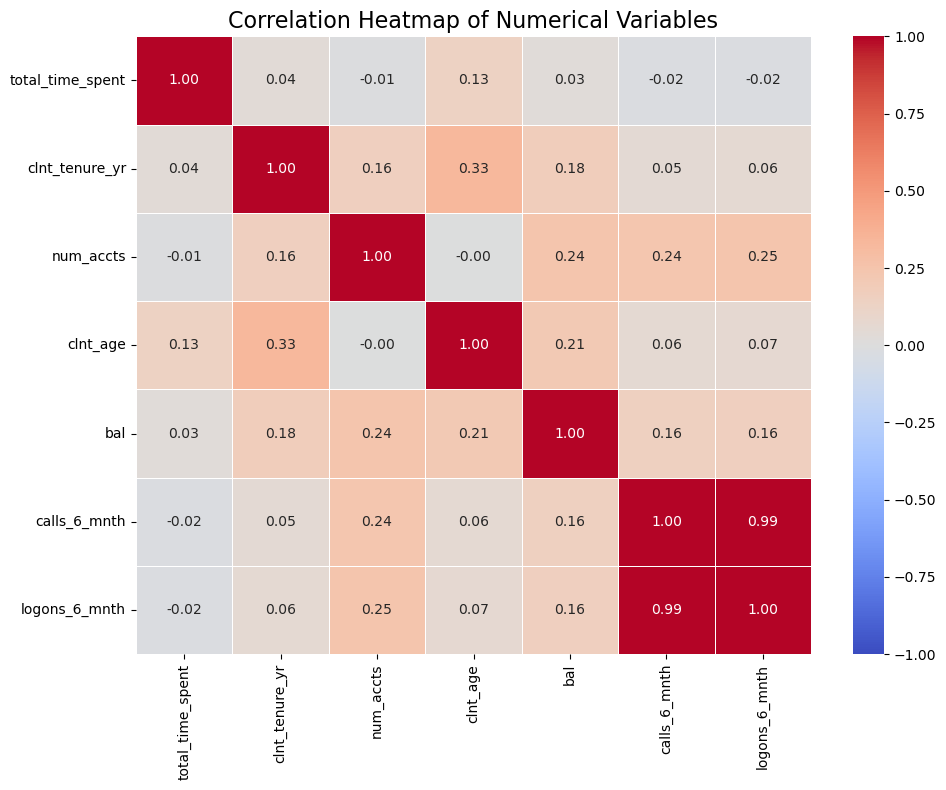

In [87]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Step 3: Customize the plot
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Remove the constant term (as it is not a predictor)
X_no_const = X.drop(columns=['const'])

# Compute the VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_no_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]

# Print the VIF for each feature
print(vif_data)

            Feature       VIF
0    clnt_tenure_yr  6.407317
1          clnt_age  6.717314
2               bal  1.282732
3      calls_6_mnth  2.822058
4            female  2.634221
5              male  2.719313
6  group_dichotomic  2.473485


In [91]:
cross_table = pd.crosstab(df_complete['total_time_spent'], df_complete['group_dichotomic'], normalize='index')
cross_table

group_dichotomic,0,1
total_time_spent,,
5.0,0.0,1.0
29.0,0.0,1.0
33.0,1.0,0.0
38.0,0.5,0.5
39.0,0.0,1.0
...,...,...
6790.0,1.0,0.0
6822.0,0.0,1.0
6937.0,0.0,1.0


In [93]:
df_complete[df_complete['client_id'] == 4647786]
# Worst time customer (Test)

,client_id,visitor_id,visit_id,start_time,confirm_time,total_time_spent,Variation_x,Variation_y,clnt_tenure_yr,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,female,male,unknown,group_dichotomic
3127,4647786,3318623_72481547258,391696103_92230204739_479887,2017-04-15 11:07:47,2017-04-15 15:45:20,16653.0,Test,Test,11.0,29.5,3.0,50662.24,1.0,4.0,1,0,0,1


In [95]:
df_complete[df_complete['client_id'] == 755076]
# Good time customer (Control)

,client_id,visitor_id,visit_id,start_time,confirm_time,total_time_spent,Variation_x,Variation_y,clnt_tenure_yr,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,female,male,unknown,group_dichotomic
510,755076,780004113_76637405470,634631042_68603981172_308188,2017-06-09 01:32:17,2017-06-09 01:41:36,559.0,Control,Control,16.0,36.0,3.0,102668.25,6.0,9.0,1,0,0,0


## The coefficient of 128.7731 for the group_dichotomic variable suggests that, controlling for other variables, clients in the Test group are expected to have a dependent variable value that is 128.77 seconds higher than those in the Control group. This effect is statistically significant.

## Each additional year of age is associated with an increase of 4.64 seconds in the dependent variable.

## Each additional account is associated with a decrease of 34.66 seconds in the dependent variable.

In [100]:
# Define the dependent and independent variables
X = df_complete[['clnt_tenure_yr', 'clnt_age', 'bal','calls_6_mnth', 'group_dichotomic']] 
Y = df_complete['total_time_spent']  # dependent variable

# Add a constant to the independent variables (for the intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_time_spent   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     27.72
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           6.80e-28
Time:                        17:54:01   Log-Likelihood:                -54014.
No. Observations:                6859   AIC:                         1.080e+05
Df Residuals:                    6853   BIC:                         1.081e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              217.7930     29.697  

In [102]:
# Remove the constant term (as it is not a predictor)
X_no_const = X.drop(columns=['const'])

# Compute the VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_no_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]

# Print the VIF for each feature
print(vif_data)

            Feature       VIF
0    clnt_tenure_yr  4.514190
1          clnt_age  6.458230
2               bal  1.273102
3      calls_6_mnth  2.789911
4  group_dichotomic  2.468443
